In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm, binom, bernoulli
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

from scipy.stats import zscore

from IPython.display import Image, display

In [2]:
from utils import my_fisherz

In [3]:
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.utils.GraphUtils import GraphUtils

/home/warrior/miniconda3/envs/brain/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df = pd.read_csv('data/model_collider.csv').values
data = zscore(df)

In [17]:
g, edges = fci(data, independence_test_method='fisherz',
               node_names=['x','y','z'],
               verbose=True)

Depth=0, working on node 2: 100%|███████████████| 3/3 [00:00<00:00, 1897.59it/s]

0 dep 1 | () with p-value 0.000000

0 dep 2 | () with p-value 0.000000

1 dep 0 | () with p-value 0.000000

1 dep 2 | () with p-value 0.000000

2 dep 0 | () with p-value 0.000000

2 dep 1 | () with p-value 0.000000

0 dep 1 | (2,) with p-value 0.000001

0 dep 2 | (1,) with p-value 0.000000

1 dep 0 | (2,) with p-value 0.000001

1 ind 2 | (0,) with p-value 0.897827

2 dep 0 | (1,) with p-value 0.000000

2 ind 1 | (0,) with p-value 0.897827



In [6]:
g.graph

array([[0, 2, 2],
       [2, 0, 0],
       [2, 0, 0]])

In [7]:
pdy = GraphUtils.to_pydot(g)

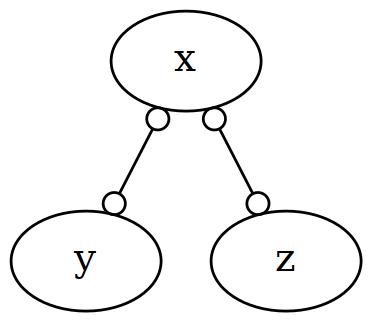

In [8]:
Image(pdy.create_png(), width=150, height=150)

In [9]:
x, y, z = data[:,0], data[:,1], data[:,2]

In [10]:
print(f'(x,y) r:{pearsonr(x,y).statistic:.4f} p:{pearsonr(x,y).pvalue:.4f}')
print(f'(x,z) r:{pearsonr(x,z).statistic:.4f} p:{pearsonr(x,z).pvalue:.4f}')
print(f'(y,z) r:{pearsonr(y,z).statistic:.4f} p:{pearsonr(y,z).pvalue:.4f}')

(x,y) r:0.5440 p:0.0000
(x,z) r:0.9711 p:0.0000
(y,z) r:0.5274 p:0.0000


In [11]:
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)
z = np.expand_dims(z, axis=1)

In [12]:
my_fisherz(x,y)
my_fisherz(x,y, condition_on=z)

19.2533, 0.0000
4.9906, 0.0000


In [15]:
my_fisherz(x,z)
my_fisherz(x,z, condition_on=y)

66.6378, 0.0000
61.2787, 0.0000


In [16]:
my_fisherz(y,z)
my_fisherz(y,z, condition_on=x)

18.5198, 0.0000
0.1284, 0.8978
